# Pymaceuticals Inc.
---

## 1. Analysis

- Observation 1: ...
- Observation 2: ...
- Observation 3: ...
 

## 2. Code

### Part 1: Preparation

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "../data/Mouse_metadata.csv"
study_results_path = "../data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
print(f"Mouse meta data columns: {mouse_metadata.columns}")
print(f"Study results columns: {study_results.columns}")

study_data = study_results.merge(mouse_metadata, on='Mouse ID', how='outer')

# Display the data table for preview
study_data.head()

Mouse meta data columns: Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], dtype='object')
Study results columns: Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'], dtype='object')


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Display the data table preview for the first time point only
study_data.loc[study_data['Timepoint']==0,:].head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
10,f932,0,45.0,0,Ketapril,Male,15,29
11,g107,0,45.0,0,Ketapril,Female,2,29
19,a457,0,45.0,0,Ketapril,Female,11,30
22,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
print(f"Number of mice in the study: {study_data['Mouse ID'].nunique()}")

Number of mice in the study: 249


In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = study_data[study_data.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]
duplicate_ids = duplicates['Mouse ID'].unique()
duplicate_ids

array(['g989'], dtype=object)

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_id = [id for id in duplicate_ids]

for id in mouse_id:
    print(f"Mouse with ID '{id}' has duplicated data")

Mouse with ID 'g989' has duplicated data


In [6]:
# Optional: Get all the data for the duplicate mouse ID.
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_id = 'g989'
cleaned_study_data = study_data.loc[study_data['Mouse ID'] != mouse_id,:]
cleaned_study_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [8]:
# Display the data table preview for the first time point only
cleaned_study_data.loc[cleaned_study_data['Timepoint']==0,:].head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
10,f932,0,45.0,0,Ketapril,Male,15,29
11,g107,0,45.0,0,Ketapril,Female,2,29
19,a457,0,45.0,0,Ketapril,Female,11,30
22,c819,0,45.0,0,Ketapril,Male,21,25


In [9]:
# Checking the number of mice in the clean DataFrame.
print(f"Number of mice in the study: {cleaned_study_data['Mouse ID'].nunique()}")

Number of mice in the study: 248


### Part 2: Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drug_data = cleaned_study_data.groupby('Drug Regimen')

summary_statistics = pd.DataFrame({'Mean Tumor Volume': drug_data['Tumor Volume (mm3)'].mean(),
                                   'Median Tumor Volume': drug_data['Tumor Volume (mm3)'].median(),
                                   'Tumor Volume Variance': drug_data['Tumor Volume (mm3)'].var(),
                                   'Tumor Volume Std. Dev.': drug_data['Tumor Volume (mm3)'].std(),
                                   'Tumor Volume Std. Err.': drug_data['Tumor Volume (mm3)'].sem()})

summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
cleaned_study_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

### Part 3: Bar and Pie Charts

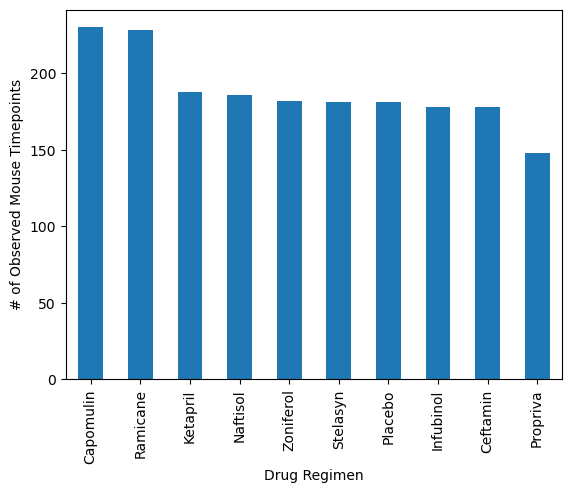

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
cleaned_study_data['Drug Regimen'].value_counts().plot(kind='bar')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

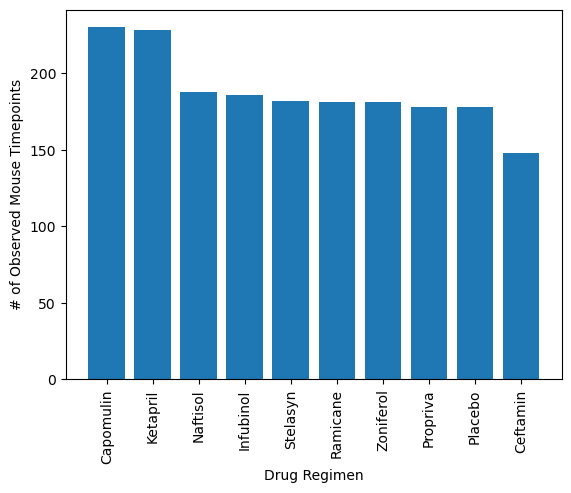

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Get data from DataFrame
y_data = cleaned_study_data['Drug Regimen'].value_counts()
x_data = range(0,len(y_data))

# Get names of drugs
drugs = cleaned_study_data['Drug Regimen'].unique().tolist()

# Plot data
fig1 = plt.figure()
plt.bar(x_data,y_data)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

plt.xticks(x_data, drugs, rotation='vertical')
plt.show()

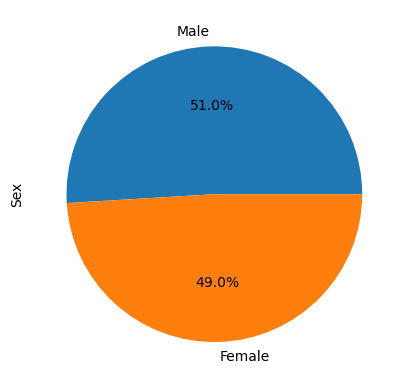

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
cleaned_study_data['Sex'].value_counts().plot(kind='pie',autopct="%1.1f%%")
plt.show()

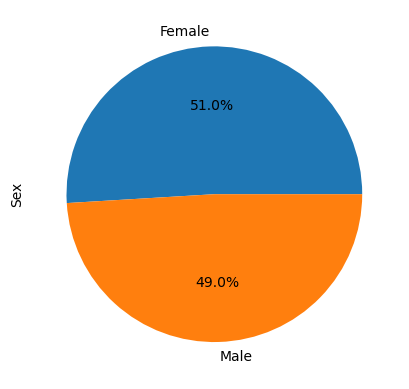

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sexes = cleaned_study_data['Sex'].value_counts()
labels_list = cleaned_study_data['Sex'].unique()

plt.pie(sexes, labels=labels_list, autopct="%1.1f%%")
plt.ylabel('Sex')
plt.show()

### Part 4: Quartiles, Outliers and Boxplots

In [50]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = cleaned_study_data.groupby('Mouse ID').max()['Timepoint']

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# NOTE: because the 'inner' method is used, only the timepoints appearing in the max_timepoint df will be kept 
study_data_with_tumor_volume = pd.merge(max_timepoint, cleaned_study_data, on=['Mouse ID','Timepoint'], how='inner')

# max_timepoint.loc['a203']
study_data_with_tumor_volume




,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [58]:
# Put treatments into a list for for loop (and later for plot labels)
focus_on_drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = {'Capomulin': [],
                  'Ramicane': [],
                  'Infubinol': [],
                  'Ceftamin': []}

# Loop through all 4 types of drugs
for drug in focus_on_drugs:
    tumor_volume = study_data_with_tumor_volume.loc[study_data_with_tumor_volume['Drug Regimen']==drug,:]['Tumor Volume (mm3)']
    tumor_vol_data[drug] = tumor_volume.to_list()

    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    # Locate the rows which contain mice on each drug and get the tumor volumes
    for vol in tumor_vol_data[drug]:
        # Determine outliers using upper and lower bounds
        if (vol > upper_bound) | (vol < lower_bound):
            print(f"Potential outlier for {drug}. Tumor volume = {vol:.2f} mm3")

    print(f"Data for drug '{drug}' processed.")
    # add subset 

Data for drug 'Capomulin' processed.
Data for drug 'Ramicane' processed.
Potential outlier for Infubinol. Tumor volume = 36.32 mm3
Data for drug 'Infubinol' processed.
Data for drug 'Ceftamin' processed.


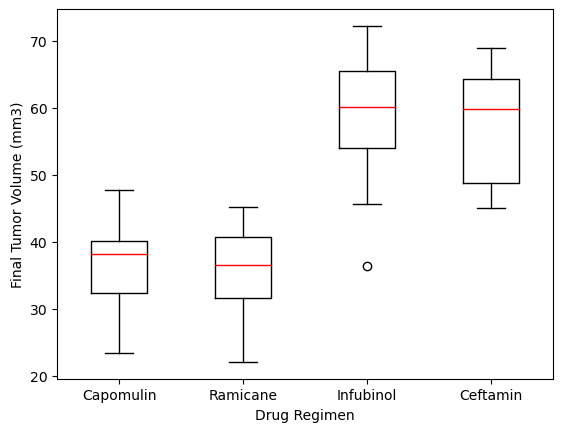

In [99]:
# Store dictionary in a DataFrame
tumor_vol_df = pd.DataFrame(tumor_vol_data)

# Set colors for boxplot
props = dict(boxes="Black", whiskers="Black", medians="Red", caps="Black")

# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig2 = tumor_vol_df.plot.box(xlabel='Drug Regimen', ylabel='Final Tumor Volume (mm3)',grid=False,color=props, patch_artist=False)

# Show plot
plt.show()

In [103]:
tumor_vol_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Capomulin  25 non-null     float64
 1   Ramicane   25 non-null     float64
 2   Infubinol  25 non-null     float64
 3   Ceftamin   25 non-null     float64
dtypes: float64(4)
memory usage: 928.0 bytes


### Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


### Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
